##### Working with our NGS table (just chip-seq samples) and the GEO-metadata final df (42022 samples)

In [2]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2
import matplotlib.pyplot as plt 
import seaborn as sns



In [4]:
pd.set_option('display.max_rows', 20)


df_ngs = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/JF_Frosi_Code_NGS-QC/NGS_HS_ChipSeq_nodup.csv')
df_geo = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/Chip-Seq-GSMs-To-Work/final_df_to_work_42022samples-NaN-filled.csv')





,Title,cell type,organism,source-cell,GSE,GSM,Library,Target-antibody,Cell line,Categories,Categories_v2
0,H3K4me3_scChIPseq_Jurkat-Ramos,None,Homo sapiens,Jurkat-Ramos,GSE117309,GSM3290887,ChIP-Seq,None,None,Trait,Trait
1,H3K27me3_scChIPseq_Jurkat-Ramos,None,Homo sapiens,Jurkat-Ramos,GSE117309,GSM3290888,ChIP-Seq,None,None,Trait,Trait
2,h3k4me_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097929,ChIP-Seq,None,CHP-134 neuroblastoma cells,Trait,Trait
3,h3k4me3_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097930,ChIP-Seq,None,CHP-134 neuroblastoma cells,Trait,Trait
4,h3k27ac_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097931,ChIP-Seq,None,CHP-134 neuroblastoma cells,Trait,Trait
...,...,...,...,...,...,...,...,...,...,...,...
42017,GATA1-A,None,Homo sapiens,Human primary adult proerythroblasts (ProEs),GSE36985,GSM970258,ChIP-Seq,None,None,Trait,Trait
42018,PolII-F (HiSeq 2000),None,Homo sapiens,Human primary fetal proerythroblasts (ProEs),GSE36985,GSM970259,ChIP-Seq,None,None,Trait,Trait
42019,PolII-A (HiSeq 2000),None,Homo sapiens,Human primary adult proerythroblasts (ProEs),GSE36985,GSM970260,ChIP-Seq,None,None,Trait,Trait
42020,IRF2-A,None,Homo sapiens,Human primary adult proerythroblasts (ProEs),GSE36985,GSM970261,ChIP-Seq,None,None,Trait,Trait


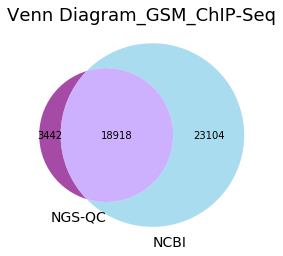

<Figure size 576x432 with 0 Axes>

In [6]:
#checking the intersection

list_ngs_gsm_chip= df_ngs['Public ID'].tolist() 
list_NCBI_gsm_chip = df_geo['GSM'].tolist()


set_ngs_gsm_chip = set(list_ngs_gsm_chip)
set_NCBI_gsm_chip = set(list_NCBI_gsm_chip)

# print(len(set_ngs_gsm_chip))
# print(len(set_NCBI_gsm_chip))

venn_gsm_ngs_NCBI_chip = venn2([set_ngs_gsm_chip, set_NCBI_gsm_chip], set_labels = ('NGS-QC', 'NCBI'), 
                                        set_colors=('purple', 'skyblue'), alpha = 0.7)


for text in venn_gsm_ngs_NCBI_chip.set_labels:
    text.set_fontsize(14)
# for text in venn_gsm_ngs_geodb_NCBI_chip.subset_labels:
#     text.set_fontsize(12)


plt.title('Venn Diagram_GSM_ChIP-Seq', fontsize=18)
plt.figure(figsize=(8,6))


plt.show()




In [7]:
#difference (intersection) from the table including all samples (even the samples that we do not have the SRR) and final table


19509 - 18918

591

In [8]:
#getting the intersection list

ncbi_ngs = set_ngs_gsm_chip.intersection(set_NCBI_gsm_chip)
ncbi_ngs_inters = list(ncbi_ngs)
print(len(ncbi_ngs_inters))


18918


In [13]:
#filtering dfs

ints_ncbi = df_geo[df_geo['GSM'].isin(ncbi_ngs_inters)].reset_index(drop=True)
ints_ngs_qc = df_ngs[df_ngs['Public ID'].isin(ncbi_ngs_inters)].reset_index(drop=True)

In [15]:
#renaming a column in ngs_qc to merge

ints_ngs_qc.rename(columns={'Public ID':'GSM'}, 
                 inplace=True)

In [16]:
#merging intersection dfs
NCBI_NGS = pd.merge(ints_ngs_qc, ints_ncbi, on='GSM', how='left')
NCBI_NGS

,GSM,Study ID,PMID,Organism,Data type,Target molecule,TMRs,QC Stamps,QC Reports,Local QC Indicators,...,Title,cell type,organism,source-cell,GSE,Library,Target-antibody,Cell line,Categories,Categories_v2
0,GSM1208708,GSE49402,23953112,Homo sapiens,ChIP-seq,ADNP,27228623 (40.71),DDC,NaN,NaN,...,batch2_chrom1_LoVo_ADNP_Rabbit_FailedQC,colon adenocarcinoma,Homo sapiens,LoVo,GSE49402,ChIP-Seq,None,LoVo,Trait,Trait
1,GSM2827324,GSE105573,22955616,Homo sapiens,ChIP-seq,ADNP-GFP,32429259 (96.72),CCC,NaN,NaN,...,ChIP-seq from K562 (ENCLB779JJT),None,Homo sapiens,Homo sapiens K562 immortalized cell line stabl...,GSE105573,ChIP-Seq,eGFP-ADNP,K562,Trait,Trait
2,GSM2827325,GSE105573,22955616,Homo sapiens,ChIP-seq,ADNP-GFP,24316354 (96.69),CCC,NaN,NaN,...,ChIP-seq from K562 (ENCLB217ZXW),None,Homo sapiens,Homo sapiens K562 immortalized cell line stabl...,GSE105573,ChIP-Seq,eGFP-ADNP,K562,Trait,Trait
3,GSM1239548,GSE51142,23953112,Homo sapiens,ChIP-seq,ADNP2,7545132 (91.84),DDD,NaN,NaN,...,batch5_chrom1_LoVo_ADNP2_Rabbit_FailedQC,colon adenocarcinoma,Homo sapiens,LoVo,GSE51142,ChIP-Seq,Abcam : ab105334,LoVo,Trait,Trait
4,GSM1208709,GSE49402,23953112,Homo sapiens,ChIP-seq,AEBP2,23279047 (47.85),CDD,NaN,NaN,...,batch2_chrom1_LoVo_AEBP2_Goat_PassedQC,colon adenocarcinoma,Homo sapiens,LoVo,GSE49402,ChIP-Seq,None,LoVo,Trait,Trait
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18913,GSM2828682,GSE105907,22955616,Homo sapiens,ChIP-seq,ZSCAN5C-GFP,30280218 (98.42),DCC,NaN,NaN,...,ChIP-seq from HEK293 (ENCLB846HBQ),None,Homo sapiens,Homo sapiens HEK293 immortalized cell line ori...,GSE105907,ChIP-Seq,eGFP-ZSCAN5C,HEK293,Trait,Trait
18914,GSM2534345,GSE96329,NaN,Homo sapiens,ChIP-seq,ZSCAN9-FLAG,39786607 (91.23),CCC,NaN,NaN,...,ChIP-seq from HepG2 (ENCLB630VJC),None,Homo sapiens,Homo sapiens HepG2 immortalized cell line stab...,GSE96329,ChIP-Seq,FLAG-ZSCAN9,HepG2,Trait,Trait
18915,GSM2534346,GSE96329,NaN,Homo sapiens,ChIP-seq,ZSCAN9-FLAG,27615965 (93.89),DCC,NaN,NaN,...,ChIP-seq from HepG2 (ENCLB675CWO),None,Homo sapiens,Homo sapiens HepG2 immortalized cell line stab...,GSE96329,ChIP-Seq,FLAG-ZSCAN9,HepG2,Trait,Trait
18916,GSM1208707,GSE49402,23953112,Homo sapiens,ChIP-seq,ZZZ3,25264648 (22.68),CCB,NaN,NaN,...,batch1_chrom1_LoVo_ZZZ3_Goat_FailedQC,colon adenocarcinoma,Homo sapiens,LoVo,GSE49402,ChIP-Seq,None,LoVo,Trait,Trait
